# Modelos Knn

Vamos a realizar nuestros primeros modelos Knn. La librería más utilizada para ML en python es `sklearn`. De aquí vamos a importar las bases de datos y las funciones que necesitamos. 

1. Vamos a trabajar con la base de datos de Iris, para comparar con lo que hemos hecho en Orange3
2. Vamos a trabajar con otra base de datos, una sobre cancer para ver cuando se nos cruzan la precisión en el train y test.  

El primer paso por tanto es importar la base de datos de iris, `load_iris`y la función que me va a dividir mi base de datos en datos para entrenar y datos para hacer el test.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
iris=load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

`iris`es un diccionario de python con las siguientes claves. Nosotros estamos interesados en `target`como clase a predecir y `data`como conjunto de características (features).

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
y = iris.target
X = iris.data

Podemos entonces dividir nuestra base de datos total en parte de entrenamiento y parte de test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Importamos el clasificador KNN, que se llama `KNeighborsClassifier`y le ponemos como argumento el número de vecinos, `n_neighbors` = 3.

In [8]:
from sklearn.neighbors import KNeighborsClassifier 

clf = KNeighborsClassifier(n_neighbors=3)

Y a partir de aquí podemos ajustar nuestro modelo a los datos de entrenamiento. Podemos predecir y podemos ver el score, la puntuación en la precisión de nuestro modelo con el test.

In [9]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [11]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.97


Vamos a hacer ahora lo mismo, pero con otra base de datos `breast_cancer`y vamos a ver si somos capaces de medir cuando se nos juntan las preciosiones con el número de vecinos a elegir.

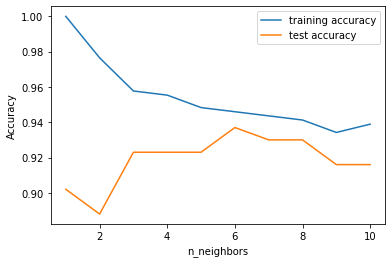

In [33]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
    
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = [] 
test_accuracy = []
# try n_neighbors from 1 to 10 
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors) 
    clf.fit(X_train, y_train)
    # record training set accuracy 
    training_accuracy.append(clf.score(X_train, y_train)) 
    # record generalization accuracy 
    test_accuracy.append(clf.score(X_test, y_test))
    
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()